In [27]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv("c:\\Users\\Mannawar Hussain\\Desktop\\Data\\energy data.csv")
df

,site name,month,consumption2017,consumption2018
0,Al Ahli Sports Club,January,31734.0,26158.0
1,Al Arabi Sports Club,January,38603.0,54423.0
2,Al Gharafa Sports Club,January,61659.0,55194.0
3,Al Khor Sports Club,January,29223.0,22737.0
4,Al Rayyan Sports Club,January,154308.0,96904.0
5,Al Attiyah MPH,January,662445.0,475767.0
6,Al Sadd Sports Club,January,167302.0,142164.0
7,Al Wakra Sports Club,January,41750.0,34786.0
8,Duhail MPH,January,667650.0,655710.0
9,Al Duhail Sports Club,January,451907.0,425843.0


In [29]:
df.head()

,site name,month,consumption2017,consumption2018
0,Al Ahli Sports Club,January,31734.0,26158.0
1,Al Arabi Sports Club,January,38603.0,54423.0
2,Al Gharafa Sports Club,January,61659.0,55194.0
3,Al Khor Sports Club,January,29223.0,22737.0
4,Al Rayyan Sports Club,January,154308.0,96904.0


In [30]:
df = df.dropna(how= 'any') #dropping na values

In [31]:
df

,site name,month,consumption2017,consumption2018
0,Al Ahli Sports Club,January,31734.0,26158.0
1,Al Arabi Sports Club,January,38603.0,54423.0
2,Al Gharafa Sports Club,January,61659.0,55194.0
3,Al Khor Sports Club,January,29223.0,22737.0
4,Al Rayyan Sports Club,January,154308.0,96904.0
5,Al Attiyah MPH,January,662445.0,475767.0
6,Al Sadd Sports Club,January,167302.0,142164.0
7,Al Wakra Sports Club,January,41750.0,34786.0
8,Duhail MPH,January,667650.0,655710.0
9,Al Duhail Sports Club,January,451907.0,425843.0


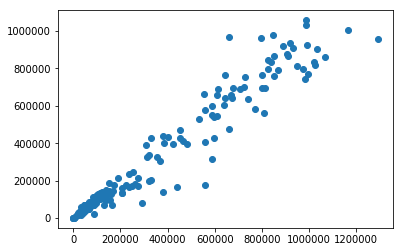

In [32]:
# sacatter plot will not contribute to such a big data, for representation see below:
plt.scatter(df['consumption2017'], df['consumption2018'])

In [39]:
km = KMeans(n_clusters = 5)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
y_predicted = km.fit_predict(df[['consumption2017', 'consumption2018']])
y_predicted

array([1, 1, 1, 1, 1, 4, 3, 1, 4, 2, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 3,
       1, 4, 2, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 3, 1, 4, 2, 4, 1, 1, 4,
       3, 1, 1, 1, 1, 3, 4, 2, 1, 4, 4, 4, 1, 1, 4, 3, 1, 1, 1, 1, 3, 0,
       2, 1, 4, 0, 0, 3, 1, 0, 2, 1, 1, 1, 1, 2, 0, 3, 1, 0, 0, 0, 3, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 3, 2, 1, 0, 0, 2, 3, 1, 0, 1, 1, 1, 1, 3,
       0, 3, 1, 0, 0, 0, 3, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 0,
       0, 0, 3, 1, 0, 2, 1, 1, 1, 1, 1, 0, 4, 1, 1, 3, 3, 1, 1, 1, 0, 1,
       0, 2, 3, 1, 0, 1, 1, 4, 2, 1, 1, 1, 3, 1, 1, 1, 4, 1, 4, 3, 1, 1,
       4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 2, 1, 2, 1, 1, 4, 1, 1, 1, 1])

In [41]:
df['cluster']= y_predicted
df

C:\Users\Mannawar Hussain\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,site name,month,consumption2017,consumption2018,cluster
0,Al Ahli Sports Club,January,31734.0,26158.0,1
1,Al Arabi Sports Club,January,38603.0,54423.0,1
2,Al Gharafa Sports Club,January,61659.0,55194.0,1
3,Al Khor Sports Club,January,29223.0,22737.0,1
4,Al Rayyan Sports Club,January,154308.0,96904.0,1
5,Al Attiyah MPH,January,662445.0,475767.0,4
6,Al Sadd Sports Club,January,167302.0,142164.0,3
7,Al Wakra Sports Club,January,41750.0,34786.0,1
8,Duhail MPH,January,667650.0,655710.0,4
9,Al Duhail Sports Club,January,451907.0,425843.0,2


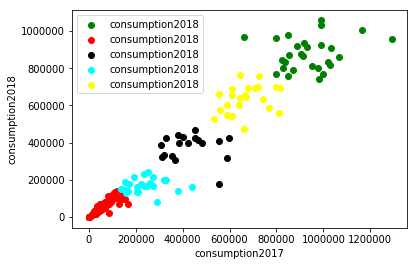

In [42]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]



plt.scatter(df1.consumption2017, df1['consumption2018'], color = 'green')
plt.scatter(df2.consumption2017, df2['consumption2018'], color = 'red')
plt.scatter(df3.consumption2017, df3['consumption2018'], color = 'black')
plt.scatter(df4.consumption2017, df4['consumption2018'], color = 'cyan')
plt.scatter(df5.consumption2017, df5['consumption2018'], color = 'yellow')

plt.xlabel('consumption2017')
plt.ylabel('consumption2018')
plt.legend()

In [43]:
scaler = MinMaxScaler()
scaler.fit(df[['consumption2018']])
df[['consumption2018']]= scaler.transform(df[['consumption2018']])

df

C:\Users\Mannawar Hussain\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mannawar Hussain\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,site name,month,consumption2017,consumption2018,cluster
0,Al Ahli Sports Club,January,31734.0,0.024730,1
1,Al Arabi Sports Club,January,38603.0,0.051451,1
2,Al Gharafa Sports Club,January,61659.0,0.052180,1
3,Al Khor Sports Club,January,29223.0,0.021495,1
4,Al Rayyan Sports Club,January,154308.0,0.091612,1
5,Al Attiyah MPH,January,662445.0,0.449787,4
6,Al Sadd Sports Club,January,167302.0,0.134401,3
7,Al Wakra Sports Club,January,41750.0,0.032886,1
8,Duhail MPH,January,667650.0,0.619904,4
9,Al Duhail Sports Club,January,451907.0,0.402589,2
